In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import h5py  
import pandas as pd
import numpy as np
import os

In [20]:

os.chdir("/home/zah/github/POP23/TESTS/")

df = pd.read_pickle('dataframe_DMDvsERA_SB_trn4_tst24_2023-Aug-23_at_21-19.h5.pkl')
df.fillna(1)

,Rank,Gamma,State,Time,gt,Fidelity_DMD,Infidelity_DMD,Fidelity_ERA,Infidelity_ERA,Distance
0,3,0.079477,1,0.06000,0.004769,1.000000,3.830269e-14,1.000000,-6.039613e-14,0.341925
1,3,0.079477,1,0.08000,0.006358,1.001361,-1.361172e-03,0.999985,1.533893e-05,0.341925
2,3,0.079477,1,0.10000,0.007948,1.002793,-2.793101e-03,0.999958,4.209515e-05,0.341925
3,3,0.079477,1,0.12000,0.009537,1.003687,-3.686883e-03,0.999931,6.889626e-05,0.341925
4,3,0.079477,1,0.14000,0.011127,1.003916,-3.916009e-03,0.999903,9.700268e-05,0.341925
...,...,...,...,...,...,...,...,...,...,...
745,5,79.477,19,0.23650,18.796311,0.999989,1.097648e-05,0.999999,6.090471e-07,0.941924
746,5,79.477,19,0.23675,18.816180,0.999990,9.989292e-06,0.999999,6.743713e-07,0.941924
747,5,79.477,19,0.23700,18.836049,0.999991,9.056445e-06,0.999999,7.396895e-07,0.941924
748,5,79.477,19,0.23725,18.855918,0.999992,8.179972e-06,0.999999,8.032497e-07,0.941924


In [21]:
df.columns

Index(['Rank', 'Gamma', 'State', 'Time', 'gt', 'Fidelity_DMD',
       'Infidelity_DMD', 'Fidelity_ERA', 'Infidelity_ERA', 'Distance'],
      dtype='object')

In [22]:
min(df.Fidelity_DMD)

0.07146470057822395

In [23]:
def add_log_infidelities(df):

    df['Infidelity_DMD'] = 1 - df.Fidelity_DMD
    df['Infidelity_ERA'] = 1 - df.Fidelity_ERA

    df['LogInF_DMD'] = np.log10(np.abs(df['Infidelity_DMD']))
    df['LogInF_ERA'] = np.log10(np.abs(df['Infidelity_ERA']))

    df.loc[df["LogInF_DMD"] < -15, "LogInF_DMD"] = -15
    df.loc[df["LogInF_ERA"] < -15, "LogInF_ERA"] = -15

    df['Gamma'] = df['Gamma'].astype(float)
    
    return df  

In [24]:
df = add_log_infidelities(df)

min(df.Fidelity_DMD)
#df.columns

/home/zah/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/zah/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.07146470057822395

In [27]:
df[df.Rank=="3"].Fidelity_DMD.min()

0.07146470057822395

/tmp/ipykernel_3616/1161908350.py:71: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


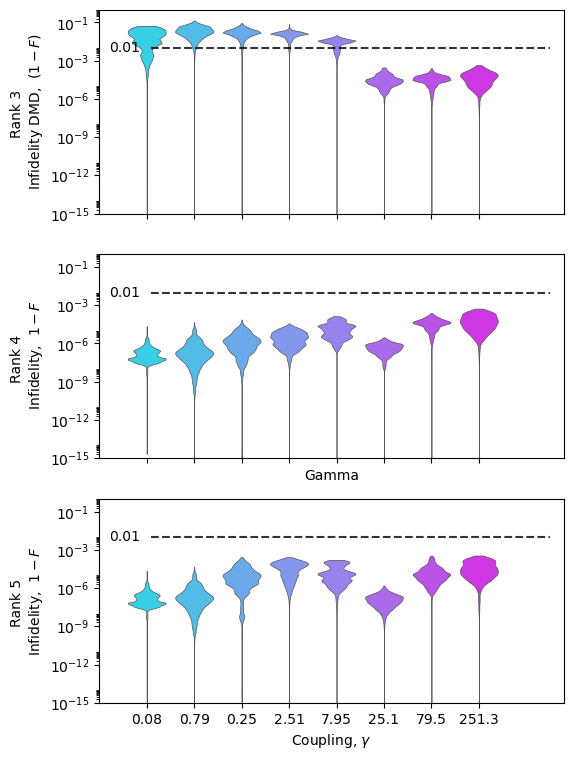

In [28]:
fig, ax = plt.subplots(3, 1, figsize=(6,9), sharex = True)

sns.violinplot(ax=ax[0], data=df[df.Rank=="3"], x="Gamma", y='LogInF_DMD', cut = 0, # hue = "Method", split=True,
                    scale="width", palette ="cool", linewidth=0.5,
                    inner= None, bw="silverman")
ymin = -15
ymax = 1.
    
ytick_range = np.arange(ymin, ymax, 3)
ytick_labels = [r'$10^{-15}$', r'$10^{-12}$',
r'$10^{-9}$', r'$10^{-6}$', r'$10^{-3}$', r'$10^{-1}$']

#ytick_labels = [r'$10^{-15}$', r'$10^{-14}$', r'$10^{-13}$', r'$10^{-12}$', r'$10^{-11}$', r'$10^{-10}$',
#r'$10^{-9}$', r'$10^{-8}$', r'$10^{-7}$', r'$10^{-6}$', r'$10^{-5}$', r'$10^{-4}$', r'$10^{-3}$',
#r'$10^{-2}$', r'$10^{-1}$', r'$10^0$']

ax[0].yaxis.set_ticks(ytick_range, ytick_labels)
ax[0].yaxis.set_ticks([np.log10(x) for p in ytick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)

ax[0].set_ylim(ymin, ymax)

ax[0].set_ylabel('Rank 3 \n'+r'Infidelity DMD,  $(1-F)$')
ax[0].set_xlabel('')

ax[0].hlines(y=np.log10(.01), xmin=0.1, xmax=8.5, colors='black', linestyles='--', alpha=0.8)
ax[0].text(-0.8, np.log10(.01), '0.01', ha='left', va='center')


sns.violinplot(ax=ax[1], data=df[df.Rank=="4"], x="Gamma", y='LogInF_DMD', cut = 0, # hue = "Method", split=True,
                    scale="width", palette ="cool", linewidth=0.5,
                    inner= None, bw="silverman")

ax[1].yaxis.set_ticks(ytick_range, ytick_labels)
ax[1].yaxis.set_ticks([np.log10(x) for p in ytick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)

ax[1].set_ylim(ymin, ymax)
ax[1].set_xlim(-1, 8.8)

ax[1].set_ylabel('Rank 4 \n'+r' Infidelity,  $1-F$')

ax[1].hlines(y=np.log10(.01), xmin=0.1, xmax=8.5, colors='black', linestyles='--', alpha=0.8)
ax[1].text(-0.8, np.log10(.01), '0.01', ha='left', va='center')


sns.violinplot(ax=ax[2], data=df[df.Rank=="5"], x="Gamma", y='LogInF_DMD', cut = 0, # hue = "Method", split=True,
                    scale="width", palette ="cool", linewidth=0.5,
                    inner= None, bw="silverman")

ax[2].yaxis.set_ticks(ytick_range, ytick_labels)
ax[2].yaxis.set_ticks([np.log10(x) for p in ytick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)

ax[2].set_ylim(ymin, ymax)
ax[2].set_xlim(-1, 8.8)

ax[2].set_ylabel('Rank 5 \n'+r'Infidelity,  $1-F$')
ax[2].set_xlabel(r'Coupling, $\gamma$')

xtick_range = np.arange(0, 8)
xtick_labels = [ '0.08', '0.79', '0.25', '2.51', '7.95', '25.1', '79.5', '251.3']

ax[2].xaxis.set_ticks(xtick_range, xtick_labels)

ax[2].hlines(y=np.log10(.01), xmin=0.1, xmax=8.5, colors='black', linestyles='--', alpha=0.8)
ax[2].text(-0.8, np.log10(.01), '0.01', ha='left', va='center')

#fig.tight_layout()
#fig.subplots_adjust(hspace = .0)

fig.savefig("DMDvsERA_SB_4-20_violin.pdf")

fig.show()

/tmp/ipykernel_3616/1722487679.py:124: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


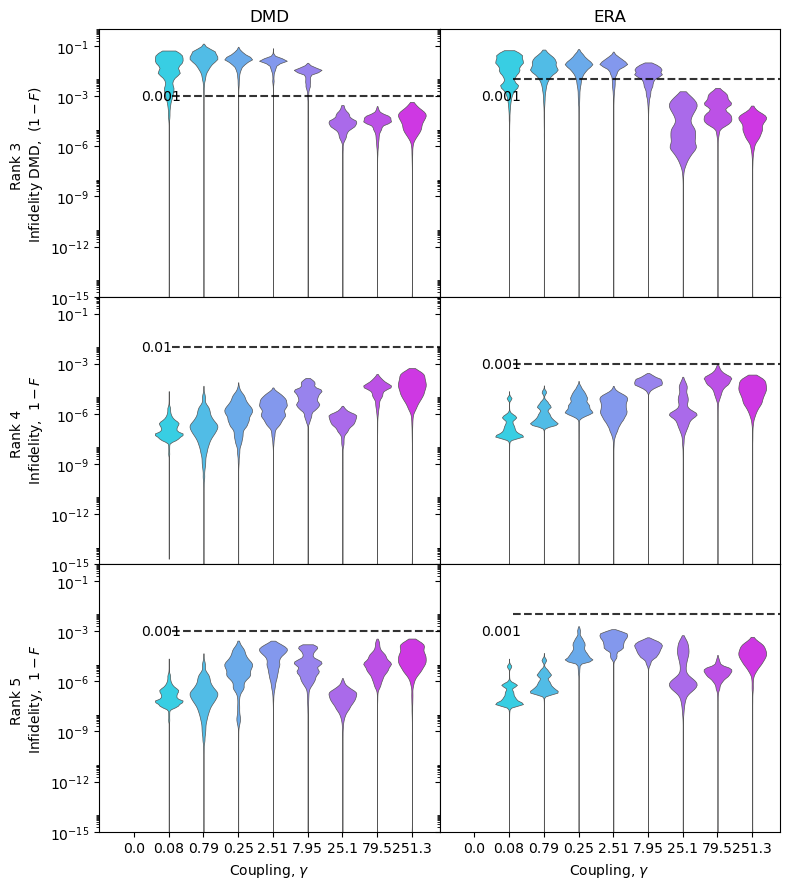

In [31]:
fig, ax = plt.subplots(3, 2, figsize=(8,9), sharex = True, sharey = True)

sns.violinplot(ax=ax[0,0], data=df[df.Rank=="3"], x="Gamma", y='LogInF_DMD', cut = 0, # hue = "Method", split=True,
                    scale="width", palette ="cool", linewidth=0.5,
                    inner= None, bw="silverman")
ymin = -15
ymax = 1.
    
ytick_range = np.arange(ymin, ymax, 3)
ytick_labels = [r'$10^{-15}$', r'$10^{-12}$',
r'$10^{-9}$', r'$10^{-6}$', r'$10^{-3}$', r'$10^{-1}$']

ax[0,0].yaxis.set_ticks(ytick_range, ytick_labels)
ax[0,0].yaxis.set_ticks([np.log10(x) for p in ytick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)

ax[0,0].set_ylim(ymin, ymax)

ax[0,0].set_ylabel('Rank 3 \n'+r'Infidelity DMD,  $(1-F)$')
ax[0,0].set_xlabel('')
ax[0,0].set_title('DMD')

ax[0,0].hlines(y=np.log10(.001), xmin=0.1, xmax=8.5, colors='black', linestyles='--', alpha=0.8)
ax[0,0].text(-0.8, np.log10(.001), '0.001', ha='left', va='center')

sns.violinplot(ax=ax[1,0], data=df[df.Rank=="4"], x="Gamma", y='LogInF_DMD', cut = 0, # hue = "Method", split=True,
                    scale="width", palette ="cool", linewidth=0.5,
                    inner= None, bw="silverman")

ax[1,0].yaxis.set_ticks(ytick_range, ytick_labels)
ax[1,0].yaxis.set_ticks([np.log10(x) for p in ytick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)

ax[1,0].set_ylim(ymin, ymax)
ax[1,0].set_xlim(-1, 8.8)

ax[1,0].set_ylabel('Rank 4 \n'+r' Infidelity,  $1-F$')
ax[1,0].set_xlabel('')

ax[1,0].hlines(y=np.log10(.01), xmin=0.1, xmax=8.5, colors='black', linestyles='--', alpha=0.8)
ax[1,0].text(-0.8, np.log10(.01), '0.01', ha='left', va='center')

sns.violinplot(ax=ax[2,0], data=df[df.Rank=="5"], x="Gamma", y='LogInF_DMD', cut = 0, # hue = "Method", split=True,
                    scale="width", palette ="cool", linewidth=0.5,
                    inner= None, bw="silverman")

ax[2,0].yaxis.set_ticks(ytick_range, ytick_labels)
ax[2,0].yaxis.set_ticks([np.log10(x) for p in ytick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)

ax[2,0].set_ylim(ymin, ymax)
ax[2,0].set_xlim(-1, 8.8)

ax[2,0].set_ylabel('Rank 5 \n'+r'Infidelity,  $1-F$')
ax[2,0].set_xlabel(r'Coupling, $\gamma$')

xtick_range = np.arange(0, 8)
xtick_labels = ['0.08', '0.79', '0.25', '2.51', '7.95', '25.1', '79.5', '251.3']

ax[2,0].xaxis.set_ticks(xtick_range, xtick_labels)

ax[2,0].hlines(y=np.log10(.001), xmin=0.1, xmax=8.5, colors='black', linestyles='--', alpha=0.8)
ax[2,0].text(-0.8, np.log10(.001), '0.001', ha='left', va='center')

sns.violinplot(ax=ax[0,1], data=df[df.Rank=="3"], x="Gamma", y='LogInF_ERA', cut = 0, # hue = "Method", split=True,
                    scale="width", palette ="cool", linewidth=0.5,
                    inner= None, bw="silverman")
ymin = -15
ymax = 1.
    
ytick_range = np.arange(ymin, ymax, 3)
ytick_labels = [r'$10^{-15}$', r'$10^{-12}$',
r'$10^{-9}$', r'$10^{-6}$', r'$10^{-3}$', r'$10^{-1}$']

ax[0,1].yaxis.set_ticks(ytick_range, ytick_labels)
ax[0,1].yaxis.set_ticks([np.log10(x) for p in ytick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)

ax[0,1].set_ylim(ymin, ymax)

ax[0,1].set_ylabel('')
ax[0,1].set_xlabel('')
ax[0,1].set_title('ERA')

ax[0,1].hlines(y=np.log10(.01), xmin=0.1, xmax=8.5, colors='black', linestyles='--', alpha=0.8)
ax[0,1].text(-0.8, np.log10(.001), '0.001', ha='left', va='center')

sns.violinplot(ax=ax[1,1], data=df[df.Rank=="4"], x="Gamma", y='LogInF_ERA', cut = 0, # hue = "Method", split=True,
                    scale="width", palette ="cool", linewidth=0.5,
                    inner= None, bw="silverman")

ax[1,1].yaxis.set_ticks(ytick_range, ytick_labels)
ax[1,1].yaxis.set_ticks([np.log10(x) for p in ytick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)

ax[1,1].set_ylim(ymin, ymax)
ax[1,1].set_xlim(-1, 8.8)

ax[1,1].set_ylabel('')
ax[1,1].set_xlabel('')

ax[1,1].hlines(y=np.log10(.001), xmin=0.1, xmax=8.5, colors='black', linestyles='--', alpha=0.8)
ax[1,1].text(-0.8, np.log10(.001), '0.001', ha='left', va='center')

sns.violinplot(ax=ax[2,1], data=df[df.Rank=="5"], x="Gamma", y='LogInF_ERA', cut = 0, # hue = "Method", split=True,
                    scale="width", palette ="cool", linewidth=0.5,
                    inner= None, bw="silverman")

ax[2,1].yaxis.set_ticks(ytick_range, ytick_labels)
ax[2,1].yaxis.set_ticks([np.log10(x) for p in ytick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)

ax[2,1].set_ylim(ymin, ymax)
ax[2,1].set_xlim(-2, 7.8)

ax[2,1].set_ylabel('')
ax[2,1].set_xlabel(r'Coupling, $\gamma$')

xtick_range = np.arange(-1, 8)
xtick_labels = [ '0.0', '0.08', '0.79', '0.25', '2.51', '7.95', '25.1', '79.5', '251.3']

ax[2,1].xaxis.set_ticks(xtick_range, xtick_labels)

ax[2,1].hlines(y=np.log10(.01), xmin=0.1, xmax=8.5, colors='black', linestyles='--', alpha=0.8)
ax[2,1].text(-0.8, np.log10(.001), '0.001', ha='left', va='center')

fig.tight_layout()
fig.subplots_adjust(hspace = .0, wspace=.0)

fig.show()

In [30]:
fig.savefig("DMDvsERA_SB_4-20_LogInfidelityLME.pdf")

In [ ]:



sns.violinplot(ax=ax[2,0], data=df[df.Rank=="rank_5"], x="Gamma", y='LogInF_DMD', cut = 0, # hue = "Method", split=True,
                    scale="width", palette ="cool", linewidth=0.5,
                    inner= None, bw="silverman")

ax[2,0].yaxis.set_ticks(ytick_range, ytick_labels)
ax[2,0].yaxis.set_ticks([np.log10(x) for p in ytick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)

ax[2,0].set_ylim(ymin, ymax)
ax[2,0].set_xlim(-1, 8.8)

ax[2,0].set_ylabel('Rank 5 \n'+r'Infidelity,  $1-F$')
ax[2,0].set_xlabel(r'Coupling, $\gamma$')

xtick_range = np.arange(0, 9)
xtick_labels = ['0.0', '0.08', '0.79', '0.25', '2.51', '7.95', '25.1', '79.5', '251.3']

ax[2,0].xaxis.set_ticks(xtick_range, xtick_labels)

ax[2,0].hlines(y=np.log10(.01), xmin=0.1, xmax=8.5, colors='black', linestyles='--', alpha=0.8)
ax[2,0].text(-0.8, np.log10(.01), '0.01', ha='left', va='center')

#fig.tight_layout()
#fig.subplots_adjust(hspace = .0)

fig.savefig("DMDvsERA_SB_4-20_violin.pdf")